# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

In [1]:
import pandas as pd
import torch as th
import numpy as np
th.device("cuda" if th.cuda.is_available() else "cpu")

device(type='cuda')

1\. Создайте тензор и исследуйте его основные характеристики

In [2]:
t = th.rand(2,3,4)
t.shape, t.dtype 

(torch.Size([2, 3, 4]), torch.float32)

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [3]:
mask = [1,0,1]

t[:,mask]

tensor([[[0.3793, 0.8532, 0.5675, 0.9314],
         [0.1669, 0.0970, 0.3652, 0.7815],
         [0.3793, 0.8532, 0.5675, 0.9314]],

        [[0.5089, 0.3033, 0.9536, 0.4463],
         [0.6970, 0.1342, 0.2108, 0.4851],
         [0.5089, 0.3033, 0.9536, 0.4463]]])

In [4]:
t[0].shape

torch.Size([3, 4])

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [5]:
t = th.rand(4,4)
display(t)

t[:,1::2] +=1
t[:,::2] -=1

t

tensor([[0.2111, 0.4611, 0.9215, 0.0396],
        [0.4264, 0.0923, 0.3468, 0.4730],
        [0.4817, 0.8132, 0.6632, 0.5056],
        [0.8231, 0.2061, 0.3411, 0.3412]])

tensor([[-0.7889,  1.4611, -0.0785,  1.0396],
        [-0.5736,  1.0923, -0.6532,  1.4730],
        [-0.5183,  1.8132, -0.3368,  1.5056],
        [-0.1769,  1.2061, -0.6589,  1.3412]])

4\. Обсудите совместимость `torch` с `numpy` и `sklearn`

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

- [x] Проверено на семинаре

In [6]:
t = th.zeros([100000, 10], dtype=th.float32)
t[th.arange(100000),th.randint(0, 10, (100000,))] = 1
t.mean(0)

tensor([0.1004, 0.0985, 0.0998, 0.1005, 0.0998, 0.1009, 0.0992, 0.1006, 0.0997,
        0.1008])

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над  побочной диагональю.

- [ ] Проверено на семинаре

In [21]:
t = th.randint(0,11,(10,10))
mask = np.bool([i[::-1] for i in np.triu(np.ones(t.shape),1)])

display(t, mask)
t[~mask]

tensor([[ 7,  3,  7,  0,  1,  9,  5,  9,  9,  2],
        [ 1,  6,  5, 10,  5, 10,  2, 10,  3,  1],
        [ 8,  4,  7,  0,  3,  7,  2,  6,  8,  2],
        [ 0,  2,  9, 10,  1,  9,  1,  1,  9, 10],
        [ 1,  7,  1,  2,  5,  4,  5,  8,  4,  1],
        [ 0,  2, 10, 10,  1,  6,  3,  5,  6,  7],
        [ 7, 10,  2, 10,  7,  4,  0,  4,  1,  1],
        [ 4,  1,  9,  8,  6,  2,  8,  5, 10,  2],
        [ 1,  2,  2, 10,  6,  7,  2,  1, 10,  2],
        [ 8,  1,  7,  8,  3, 10,  0,  9,  9,  3]])

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True, False, False,
        False],
       [ True,  True,  True,  True,  True,  True, False, False, False,
        False],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False],
       [ True,  True,  True,  True, False, False, False, False, False,
        False],
       [ True,  True,  True, False, False, False, False, False, False,
        False],
       [ True,  True, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

tensor([ 2,  3,  1,  6,  8,  2,  1,  1,  9, 10,  4,  5,  8,  4,  1,  1,  6,  3,
         5,  6,  7, 10,  7,  4,  0,  4,  1,  1,  9,  8,  6,  2,  8,  5, 10,  2,
         2,  2, 10,  6,  7,  2,  1, 10,  2,  8,  1,  7,  8,  3, 10,  0,  9,  9,
         3])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулите все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

- [x] Проверено на семинаре

In [82]:
t = th.randint(0,101,(5,5))
row_max, col_max = th.unravel_index(th.argmax(t), t.shape)

row_start = max(0, row_max - 1)
row_end = min(5, row_max + 2)
col_start = max(0,col_max - 1)
col_end = min(5, col_max + 2)

mask = th.ones_like(t, dtype=th.bool)
mask[row_start:row_end, col_start:col_end] = False

result = t.clone()
result[~mask] = 0

t, result

(tensor([[49, 85,  4, 17,  4],
         [45, 99,  2,  4, 41],
         [80, 91, 90, 81, 57],
         [18, 75, 17, 93, 64],
         [70, 52, 32, 41,  2]]),
 tensor([[ 0,  0,  0, 17,  4],
         [ 0,  0,  0,  4, 41],
         [ 0,  0,  0, 81, 57],
         [18, 75, 17, 93, 64],
         [70, 52, 32, 41,  2]]))

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

- [x] Проверено на семинаре

In [85]:
t_u = th.stack([t, result], dim=0)
display(t_u)
th.save(t_u, 'tensor.pt')

load_t=th.load('tensor.pt')
display(load_t)
th.all(t_u == load_t)

tensor([[[49, 85,  4, 17,  4],
         [45, 99,  2,  4, 41],
         [80, 91, 90, 81, 57],
         [18, 75, 17, 93, 64],
         [70, 52, 32, 41,  2]],

        [[ 0,  0,  0, 17,  4],
         [ 0,  0,  0,  4, 41],
         [ 0,  0,  0, 81, 57],
         [18, 75, 17, 93, 64],
         [70, 52, 32, 41,  2]]])

tensor([[[49, 85,  4, 17,  4],
         [45, 99,  2,  4, 41],
         [80, 91, 90, 81, 57],
         [18, 75, 17, 93, 64],
         [70, 52, 32, 41,  2]],

        [[ 0,  0,  0, 17,  4],
         [ 0,  0,  0,  4, 41],
         [ 0,  0,  0, 81, 57],
         [18, 75, 17, 93, 64],
         [70, 52, 32, 41,  2]]])

tensor(True)

<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

- [x] Проверено на семинаре

In [90]:
t5 = th.randint(1,11,(2, 3, 5, 5), dtype=th.float32)
t5.mean(dim=(3,2), keepdim=False).reshape(2,3,1)

tensor([[[4.8400],
         [5.8800],
         [5.4000]],

        [[5.4000],
         [6.1600],
         [5.0400]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

- [x] Проверено на семинаре

end_cpu=1.8041253089904785 sec


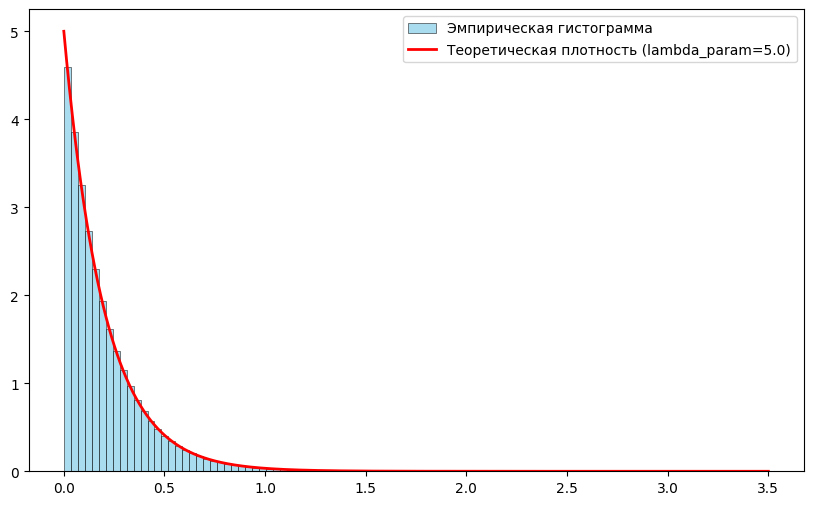

Cuda available!
end_gpu=0.0019915103912353516 sec


In [80]:
import matplotlib.pyplot as plt
import time
N=100_000_000
lambda_param = 5.0

start_cpu = time.time()
exponential_dist = th.distributions.Exponential(th.tensor(lambda_param))
sample_tensor = exponential_dist.sample([N])
end_cpu = time.time() - start_cpu

print(f'{end_cpu=} sec')

plt.figure(figsize=(10, 6))
plt.hist(sample_tensor.numpy(), bins=100, density=True, alpha=0.7, color='skyblue', edgecolor='black', linewidth=0.5, label='Эмпирическая гистограмма')
x = np.linspace(0, 3.5, 1000)
y = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, y, 'r-', linewidth=2, label=f'Теоретическая плотность ({lambda_param=})')
plt.legend()
plt.show()



if th.cuda.is_available():
    print('Cuda available!')
    start_gpu = time.time()
    exponential_dist = th.distributions.Exponential(th.tensor(lambda_param, device='cuda'))
    sample_tensor = exponential_dist.sample([N])
    end_gpu = time.time() - start_gpu

    print(f'{end_gpu=} sec')

<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите третий и четвертый столбцы; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

- [ ] Проверено на семинаре

In [95]:
t = th.randint(0,256,(10, 6, 6, 3))
t[:, :, :, 0]

tensor([[[124,  87,  87,  43,   0, 151],
         [ 48, 101,   2,   0, 200,  52],
         [222, 106, 236,  20, 127,  14],
         [ 10, 127,  18, 227,  89, 234],
         [185,  73, 207, 153, 213,   0],
         [ 42, 245, 225, 160, 110, 140]],

        [[125,  52, 146,  26,  94, 177],
         [ 79,  51, 189, 169,  52,  87],
         [ 24,  35, 212,  37, 102, 176],
         [195, 214, 140, 125, 112, 197],
         [119, 177,  70,  90,  21, 109],
         [ 96, 230, 146,  40, 189, 123]],

        [[156,  72,  10, 169, 226, 149],
         [131, 137,  72,  81,  97,  53],
         [101, 188, 125,  92,  61, 103],
         [ 35, 254, 245,   1, 127, 106],
         [ 29, 251, 206, 241,  96,  87],
         [207, 100,  84,  28, 226, 115]],

        [[230, 162, 210, 148, 195, 206],
         [ 48, 109,  92,  34,  63,  43],
         [199, 183, 241,  85, 140, 180],
         [182, 131, 133, 241, 239,  86],
         [201,  29,   3,  38,  80,  78],
         [ 99, 207, 137, 148, 229, 124]],

        

In [98]:
t[:, :, :, 0][:,:2]

tensor([[[124,  87,  87,  43,   0, 151],
         [ 48, 101,   2,   0, 200,  52]],

        [[125,  52, 146,  26,  94, 177],
         [ 79,  51, 189, 169,  52,  87]],

        [[156,  72,  10, 169, 226, 149],
         [131, 137,  72,  81,  97,  53]],

        [[230, 162, 210, 148, 195, 206],
         [ 48, 109,  92,  34,  63,  43]],

        [[200, 110, 157,  68,  99,   6],
         [ 48,  73, 252,  24,   6,  53]],

        [[164, 190,  69, 248,  47, 223],
         [240, 131, 209,  17,  54,  11]],

        [[133, 152,   1,  25, 111, 127],
         [ 51, 229, 232, 183,   2, 231]],

        [[ 21,  82, 199,   3, 248,   4],
         [ 34, 234, 192, 142, 243,  47]],

        [[ 54, 201,  39, 209,  63,  90],
         [ 80,  68,  21, 220, 210,   1]],

        [[ 74, 249, 223,  18, 128, 224],
         [ 13,  66,   1,  87,  11, 228]]])